# Recherche dans une liste triée

Dans le cadre de la gestion d'un très grand nombre de données (base de données, gestion de stock, carnet d'adresses...), on peut être amené à faire des recherches régulières sur celles-ci. 
En triant les données selon un critère, il est possible d'effectuer des recherches plus efficaces par la suite.

Soit une liste triée $L$ de taille $n$.

En exécutant le code suivant, on initialise une liste d'entiers avec le module random.

In [2]:
from numpy.random import randint
#liste de taille 1000 prenant des nombres aléatoires entre 0 et 999999999
L = randint(1000000000, size = 1000) 
L.sort()

Ces commandes permettent de créer une liste de taille 1000 en prenant aléatoirement des entiers naturels jusqu'à 1000000000 et de la trier ensuite de manière efficace. Les algorithmes de tris seront étudiés dans de prochains TPs.

## Recherche naïve

On commence par réaliser une algorithme naïf qui consiste à parcourir l'ensemble des valeurs de la liste.

!!! question Question 1
Proposer une fonction ``recherche\_naive(L, val)`` prenant en argument une liste triée $L$ et une valeur $val$ à rechercher dans celle-ci qui renvoie ``True`` si la valeur est présente et ``False`` sinon.
!!!

In [4]:
def recherche_naive(L,val):
    return

On peut réaliser quelques optimisations car la liste est déjà triée :
* on peut vérifier si la valeur à chercher n'est pas strictement inférieure au premier terme de la liste,
* on peut vérifier si la valeur à chercher n'est pas strictement supérieure au dernier terme de la liste,
* on peut sortir de la boucle de recherche dès que la valeur de la liste est strictement supérieure à la valeur recherchée.

!!! question Question 2
Mettre en place ces optimisations.
!!!

Un élément important en vérification des programmations est d'être capable de choisir un jeu de test permettant de vérifier que l'algorithme fonctionne pour tous les cas et notamment les cas limites.

C'est le rôle des tests dit unitaires réalisés dans tout développement de logiciels.

!!! question Question 3
Proposer un jeu de tests qui doit comporter au moins 4 cas. Tester votre programme à l'aide de ces différents tests et le modifier au besoin.
!!!


On souhaite déterminer le temps de calcul pour une liste de taille plus significative de 10 000 000 de valeurs.

Le code suivant permet d'afficher le temps de calcul de la fonction.


In [6]:
import time
tic = time.time() #donne un temps de référence en secondes
valeur=1000
recherche_naive(L, valeur)
print(time.time()-tic) #donne le temps écoulé depuis le dernier time.time()

0.0


!!! question Question 4
Mesurer le temps de calcul de la fonction naïve et comparer le à la recherche interne de python : ``val in L}`` (qu'il ne faut jamais utiliser en concours d'informatique).
!!!

!!! question Question 5
Donner la complexité de la recherche naïve en fonction de la taille de la liste. Pour cela, vous compterez le nombre de comparaisons effectuer en fonction de la taille de la liste.
!!!

!!! remark Remarque
On parle de complexité linéaire si le nombre de comparaisons est proportionnel à la taille de la liste, de complexité quadratique si le nombre de comparaisons est proportionnel à la taille de la liste au carré...
!!!


## Recherche par dichotomie
La méthode par dichotomie fait partie des algorithmes basés sur le principe du _diviser pour régner_. 

La liste étant triée, l'idée est de tester si le terme du milieu de la liste est inférieur strictement, supérieur strictement ou égal à la valeur recherchée. S'il est égal, on a trouvé la valeur et l'algorithme renvoie ``True``, sinon s'il est strictement inférieur, on cherche la valeur dans la demi-liste de gauche, et sinon dans la demi-liste de droite.
On itère jusqu'à ce que la liste de recherche soit vide.

On constate que l'intervalle de recherche est divisé par deux à chaque itération, ce qui permet de converger très vite.

!!! question Question 6 
Proposer une fonction ``recherche_dicho(L, val)`` basée sur cette méthode. Vous utiliserez une boucle ``while`` en réfléchissant bien à la condition d'arrêt. Valider votre fonction avec le jeu de test précédent.
!!!


!!! question Question 7
Mesurer le temps de calcul de la fonction et le comparer aux temps précédents.
!!!

!!! question Question 8
Modifier la fonction précédente pour qu'elle renvoie également le nombre de comparaisons réalisées.
!!!

On va maintenant tracer l'évolution du nombre de comparaisons réalisées en fonction de la taille de la liste pour des tailles variant de 10 à 1 000 000.

!!! question Question 9
Mettre en place une série d'instructions permettant de déterminer les nombres de comparaisons en fonction de la taille de la liste $L$ et les stocker dans une liste. Vous veillerez à répartir de manière homogène les différentes tailles de la liste variant de 10 à 1 000 000.
!!!


Pour faire une représentation graphique d'une liste en fonction d'une autre, il faut exécuter les commandes suivantes.

!!! question Question 10
Modifier liste_x, liste_y pour visaliser l'évolution du nombre de comparaisons en fonction de la taille de la liste L.
Proposer une expression d'une fonction pouvant interpoler la courbe précédente.
!!!

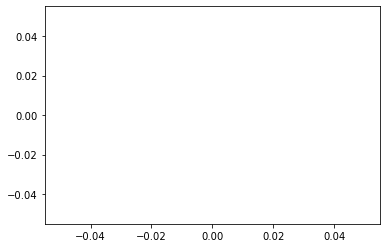

In [7]:
from matplotlib.pyplot import plot,show
liste_x=[]
liste_y=[]
plot(liste_x, liste_y)
show()

On peut remarquer que dans le pire des cas, si la valeur n'est pas dans la liste, l'algorithme va découper l'intervalle en deux jusqu'à atteindre un intervalle de dimension nulle.

En notant $N$ la taille de la liste, le nombre de divisions de l'intervalle $n$ est telle que $2^n \leq N$.

!!! question Question 11
Donner la valeur maximale de $n$ en fonction de $N$. Tracer cette fonction en la superposant au tracé précédent. Conclure.
!!!
 		

# Exponentiation rapide

Pour calculer $x^n$, on peut utiliser exactement le même principe. On parle d'exponentiation rapide.

Dans cet exercice, on a droit aux opérations ``+``, ``-``, ``*``, ``/``, ``//``, ``%`` mais pas à ``**``.


!!! question Question 12
Écrire une fonction ``Puissance(x,n)`` qui prend en arguments un flottant $x$ et un entier naturel $n$ et renvoie la valeur de $x^n$ de manière naïve. Évaluer le nombre d'opérations nécessaires en fonction de la valeur de $n$ et vérifier que la complexité est linéaire.
!!!


{On met en application la même idée qu'avec l'algorithme de dichotomie, qui consiste à diviser par 2 la grandeur considérée à chaque étape (ici : la valeur de $n$ alors que dans l'exercice précédent c'était la longueur de la liste.). Par exemple, au lieur d'écrire $x^8=x^7*x$, on peut utiliser $x^8=(x \times x)^4$ et de même $x^9=(x \times x)^4 \times x$. On fait ainsi "tomber les puissances" plus rapidement.

!!! question Question 13 
Ecrire une fonction ``exponentiationRapide(x,n)`` qui prend en arguments un flottant $x$ et un entier naturel $n$, calcule $x^n$ avec l'algorithme d'exponentiation rapide et renvoie sa valeur. Pour ce faire :
* on définira au départ les variables \pythoninline{y=x, m=n} et \pythoninline{e=1} : ainsi au départ $x^n=y^m \times e$.
* on construira une boucle qui fait baisser la valeur de $m$ et modifie celles de $y$ et $e$ de manière à toujours avoir l'égalité $x^n=y^m \times e$ au début du passage dans la boucle. A chaque passage dans la boucle, la valeur de $m$ est changée en $m//2$.
* la boucle s'arrête lorsque $m \leq 1$ : si $m=1$, on a alors $x^n=y^m \times e = y \times e$ ; si $m=0$, on a alors $x^n=y^m\times e=e$. Dans tous les cas, on obtient facilement cette valeur. 
!!!
